In [2]:
import pandas as pd
from scipy.stats import ttest_ind


url = 'https://drive.usercontent.google.com/download?id=1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo&export=download&authuser=0&confirm=t&uuid=9e6e5d4b-d7de-475e-87c1-30313bec51eb&at=AENtkXaicSIhSbOG1l58SL5lcPWo%3A1730320503242.csv'  # 替换为实际数据集链接
data = pd.read_csv(url)

data = data[data.DATASET == "2022 Cross-Sectional"]


west_provinces = ['Yukon', 'Northwest Territories', 'British Columbia', 'Alberta', 'Saskatchewan', 'Manitoba']
east_provinces = ['Ontario', 'Québec', 'Newfoundland and Labrador', 'New Brunswick', 'Prince Edward Island', 'Nova Scotia']


data['Region'] = data['GEO_province'].apply(
    lambda x: 'West' if x in west_provinces else ('East' if x in east_provinces else None)
)


subset_data = data.dropna(subset=['PSYCH_body_self_image_questionnaire_negative_affect_score', 'Region'])


west_scores = subset_data[subset_data['Region'] == 'West']['PSYCH_body_self_image_questionnaire_negative_affect_score']
east_scores = subset_data[subset_data['Region'] == 'East']['PSYCH_body_self_image_questionnaire_negative_affect_score']


t_stat, p_value = ttest_ind(east_scores, west_scores, alternative='greater')


print("T-statistic:", t_stat)
print("P-value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: East has a higher average negative affect score than West.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that East has a higher average negative affect score than West.")


/tmp/ipykernel_119/3521147593.py:6: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


T-statistic: -0.26548705462864186
P-value: 0.6046413453567354
Fail to reject the null hypothesis: No significant evidence that East has a higher average negative affect score than West.


/tmp/ipykernel_119/117185349.py:7: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://drive.usercontent.google.com/download?id=1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo&export=download&authuser=0&confirm=t&uuid=9e6e5d4b-d7de-475e-87c1-30313bec51eb&at=AENtkXaicSIhSbOG1l58SL5lcPWo%3A1730320503242.csv')


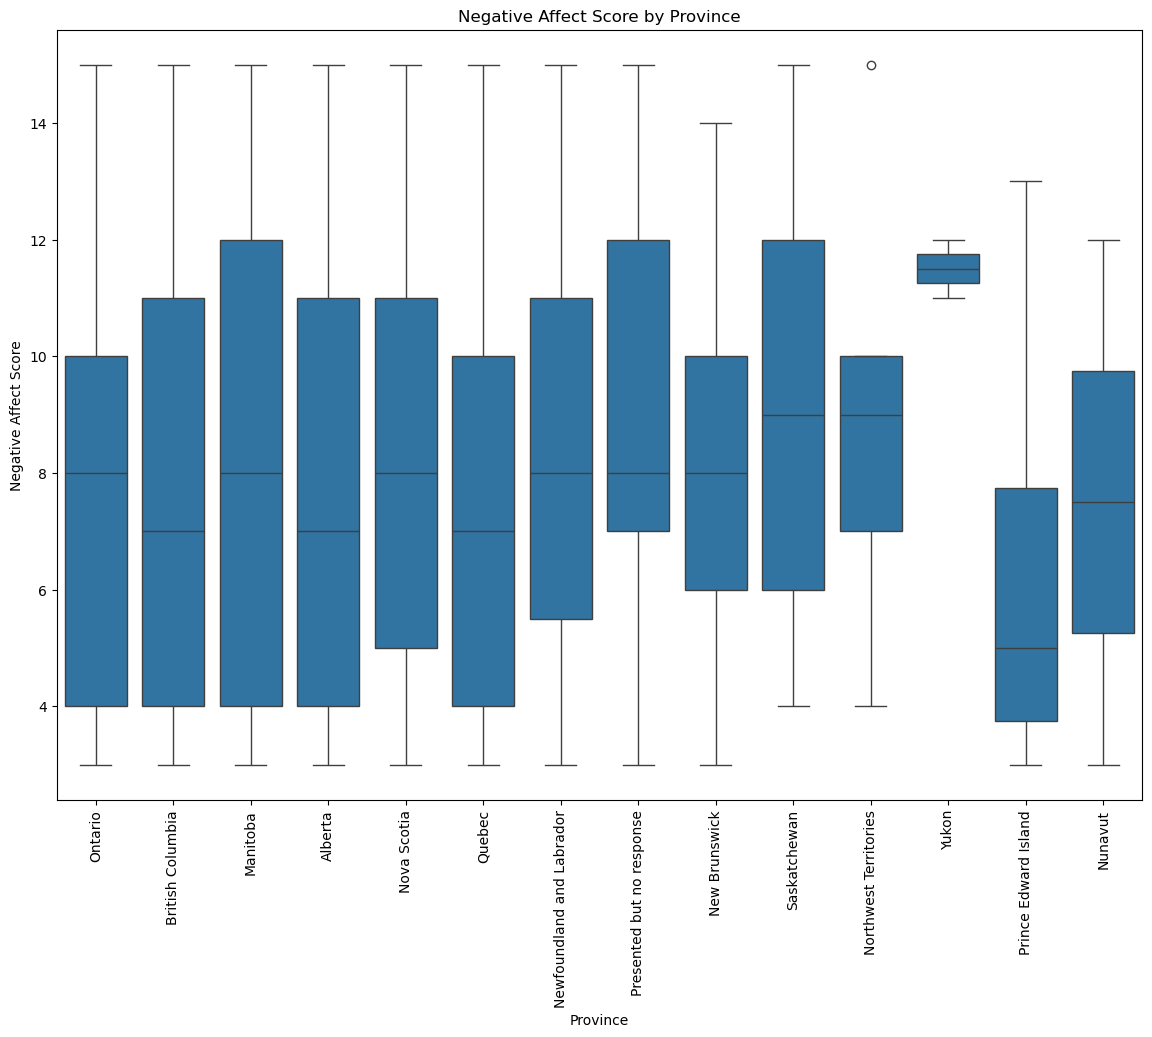

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# Step 1: Data Selection and Preprocessing
data = pd.read_csv('https://drive.usercontent.google.com/download?id=1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo&export=download&authuser=0&confirm=t&uuid=9e6e5d4b-d7de-475e-87c1-30313bec51eb&at=AENtkXaicSIhSbOG1l58SL5lcPWo%3A1730320503242.csv')
columns = [
    'GEO_province', 'GEO_residence_canada',
    'PSYCH_body_self_image_questionnaire_height_dissatisfaction_score',
    'PSYCH_body_self_image_questionnaire_fatness_evaluation_score',
    'PSYCH_body_self_image_questionnaire_negative_affect_score',
    'PSYCH_body_self_image_questionnaire_social_dependence_score'
]
subset_data = data[columns].dropna()

# Step 2: Exploratory Data Analysis

plt.figure(figsize=(14, 10))
sns.boxplot(data=subset_data, x='GEO_province', 
            y='PSYCH_body_self_image_questionnaire_negative_affect_score')
plt.xticks(rotation=90)
plt.title("Negative Affect Score by Province")
plt.xlabel("Province")
plt.ylabel("Negative Affect Score")
plt.show()

In [5]:
import numpy as np
import pandas as pd

# Step 1: Observed statistics
observed_mean_difference = east_scores.mean() - west_scores.mean()
print("Observed Mean Difference (East - West):", observed_mean_difference)

# Step 2: Combine data for bootstrap sampling
pooled_data = np.concatenate([east_scores.values, west_scores.values])

# Step 3: Bootstrap resampling
np.random.seed(42)  # Set a seed for reproducibility
n_bootstrap = 10000
bootstrap_differences = []

# Sizes of the original groups
n_east = len(east_scores)
n_west = len(west_scores)

for _ in range(n_bootstrap):
    # Resample and split into "East" and "West" groups
    shuffled = np.random.choice(pooled_data, size=len(pooled_data), replace=True)
    east_sample = shuffled[:n_east]
    west_sample = shuffled[n_east:]
    
    # Compute the mean difference for the resample
    bootstrap_differences.append(east_sample.mean() - west_sample.mean())

# Step 4: Calculate the p-value
bootstrap_differences = np.array(bootstrap_differences)
p_value_bootstrap = np.mean(bootstrap_differences >= observed_mean_difference)

print("Bootstrap p-value:", p_value_bootstrap)

# Step 5: Hypothesis test result
alpha = 0.05
if p_value_bootstrap < alpha:
    print("Reject the null hypothesis: East has a higher average negative affect score than West.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that East has a higher average negative affect score than West.")



Observed Mean Difference (East - West): -0.07986724036481352
Bootstrap p-value: 0.6047
Fail to reject the null hypothesis: No significant evidence that East has a higher average negative affect score than West.


/tmp/ipykernel_119/3535237734.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Region'] = subset_data['GEO_province'].apply(
/tmp/ipykernel_119/3535237734.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_data, x='Region', y='PSYCH_body_self_image_questionnaire_negative_affect_score', palette='pastel')


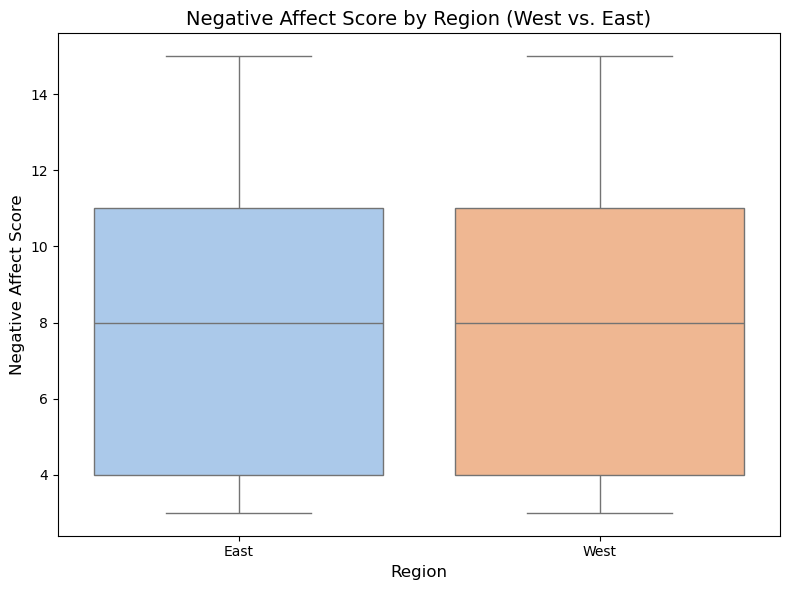

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recreate subset_data
subset_data = data.dropna(subset=['PSYCH_body_self_image_questionnaire_negative_affect_score', 'GEO_province'])

# Create the Region column
west_provinces = ['Yukon', 'Northwest Territories', 'British Columbia', 'Alberta', 'Saskatchewan', 'Manitoba']
east_provinces = ['Ontario', 'Québec', 'Newfoundland and Labrador', 'New Brunswick', 'Prince Edward Island', 'Nova Scotia']

subset_data['Region'] = subset_data['GEO_province'].apply(
    lambda x: 'West' if x in west_provinces else ('East' if x in east_provinces else None)
)

# Filter for only valid Regions
subset_data = subset_data[subset_data['Region'].notnull()]

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset_data, x='Region', y='PSYCH_body_self_image_questionnaire_negative_affect_score', palette='pastel')

# Add titles and labels
plt.title("Negative Affect Score by Region (West vs. East)", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Negative Affect Score", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


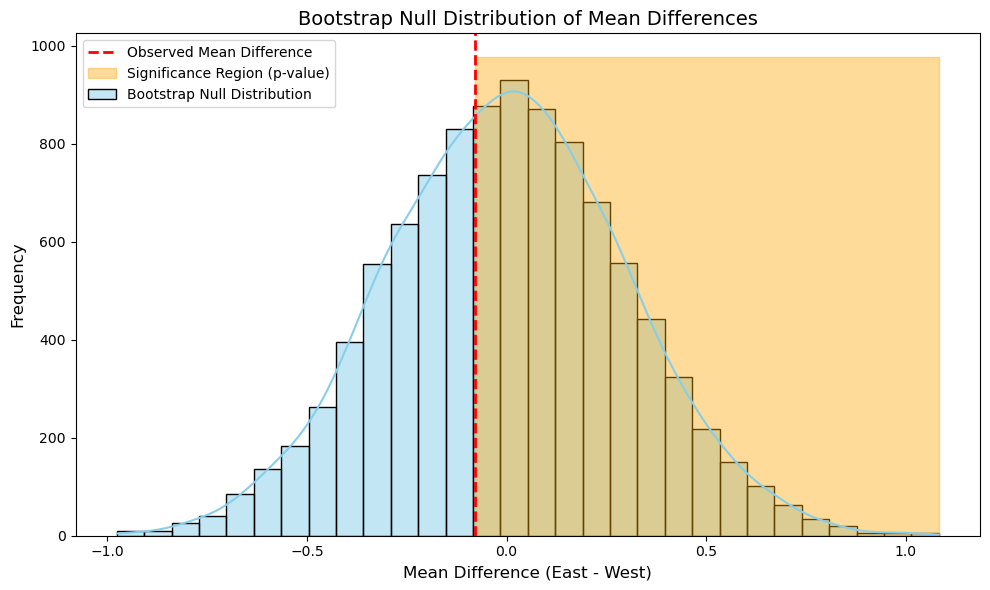

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualize the bootstrap null distribution
plt.figure(figsize=(10, 6))

# Plot the bootstrap distribution
sns.histplot(bootstrap_differences, kde=True, bins=30, color='skyblue', label='Bootstrap Null Distribution')

# Add a vertical line for the observed mean difference
plt.axvline(x=observed_mean_difference, color='red', linestyle='--', linewidth=2, label='Observed Mean Difference')

# Highlight the significance region
plt.fill_betweenx(
    y=[0, plt.gca().get_ylim()[1]], 
    x1=observed_mean_difference, 
    x2=max(bootstrap_differences), 
    color='orange', alpha=0.4, label='Significance Region (p-value)'
)

# Add titles and labels
plt.title("Bootstrap Null Distribution of Mean Differences", fontsize=14)
plt.xlabel("Mean Difference (East - West)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(loc='upper left', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
